# Transit duration

In this notebook we calculate an estimate for the maximum duration of transit.

The maximum duration of a transit, $\Delta T$, for a single object on a near parabolic orbit is given by the equation:

$\Delta T \lesssim {\sqrt{2} R_*}/{\sqrt{q \times dv_r/dt}}$

where $\Delta T$ is the maximum transit duration, $R_*$ the radius of the star, $q$ the periastron distance and $dv_r/dt$ the acceleration.

We use the results from the 2018-03-17 data (distance from comet to star and acceleration) to calculate the maximum transit duration.

In [1]:
import math as m
import numpy as np
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def w_ave(x, xerr):
    # Given an array of values and corresponding uncertainty
    # we can use this function to calculate the weighted average.
    weights = 1./(xerr**2)
    w_ave   = np.average(x, axis=0, weights=weights)
    uncertainty = 1/np.sum(weights)*np.sqrt(np.sum((weights*xerr)**2))
    return w_ave, uncertainty

In [2]:
dist        = np.array([8.3,7.1])
dist_err    = np.array([2.8,2.2])

dvdt        = np.array([2.1,2.9])
dvdt_err    = np.array([0.7,0.9])

dist_w_ave, dist_uncertainty = w_ave(dist, dist_err)
dvdt_w_ave, dvdt_uncertainty = w_ave(dvdt, dvdt_err)

print("Distance from star:",round(dist_w_ave,1),"±",round(dist_uncertainty,1),"R*")
print("Confidence:",round(dist_w_ave/dist_uncertainty,1),"sigma")

print("\nAcceleration:",round(dvdt_w_ave,1),"±",round(dvdt_uncertainty,1),"m/s^2")
print("Confidence:",round(dvdt_w_ave/dvdt_uncertainty,1),"sigma")

Distance from star: 7.6 ± 1.7 R*
Confidence: 4.4 sigma

Acceleration: 2.4 ± 0.6 m/s^2
Confidence: 4.3 sigma


In [3]:
R = 1.8*const.R_sun # The radius of beta Pic
q = dist_w_ave*R #
dvdt = dvdt_w_ave*u.meter/u.second**2

In [4]:
dT = np.sqrt(2)*R/np.sqrt(q*dvdt)
dT_err = 1./(np.sqrt((dist_w_ave/dist_uncertainty))+np.sqrt(dvdt_w_ave/dvdt_uncertainty))
print("Maximum transit duration:",round(dT.to(u.hour).value,1),"±",round(dT_err,1),"hours")

Maximum transit duration: 3.3 ± 0.2 hours


A exocometary feature is first seen at 04:37:42 and lasting until the end of observations at 07:48:43. A difference of 3 h 11 min. We estimate that the transit duration should at most last ~ 3 h 12 min. It is such a shame we were not able to observe for another 30 min to an hour. We may have caught the end of the transit perhaps!

## Calculating the periastron distance and longitude

For this calculation we use equations (22) from Kiefer et al. (2014).

Periastron distance and longitude. Assuming that each exocomet exhibits a near parabolic orbit, an estimate of the distance to the star, together with the measurement of the radial velocity at the time of the transit, allows an estimation of the periastron orientation and distance. We define $\bar{\omega}$ to be the longitude of the periastron, which is the true anomaly of the line of sight with respect to the exocomet's periastron, and $Q$ to be the periastron distance in units of stellar radius, $R_\star$ . These two quantities can be expressed with respect to the distance and the radial velocity by solving:

$$v_r = \sqrt{\frac{GM_\star}{R_\star d}}\frac{sin\bar{\omega}}{\sqrt{1+cos\bar{\omega}}}$$

and

$$d=\frac{2Q}{1+cos\omega}$$

In [20]:
G = const.G
M = 2*const.M_sun
v = 140 * u.km / u.second
d = dist_w_ave

[0.15658803]


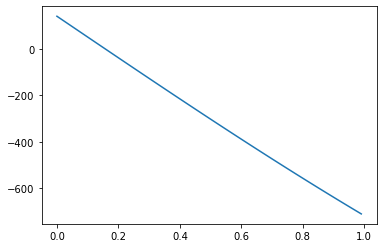

In [21]:


func = lambda omega : v - (np.sqrt(G*M/R*d)*np.sin(omega)/np.sqrt(1 + np.cos(omega)))

omega = np.arange(0,1,0.01)

initial_guess = 0.2

omega_solution = fsolve(func, initial_guess)

plt.plot(omega, func(omega))

print(omega_solution)

In [22]:
print(2*dist_w_ave/(1+np.cos(omega_solution)))

[7.60456461]


In [23]:
omega = 0.15
print(np.sqrt(G*M/R*d)*np.sin(omega)/np.sqrt(1 + np.cos(omega))/1e3)

134.12116188465725 m / s
